In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
#folder shortcut
path = r'C:\Users\cook family\Desktop\Citi_Bike'

In [4]:
citibike = pd.read_csv(os.path.join(path, '02 Data' , 'prepared data' , 'citi_4.csv'), index_col = False)

In [5]:
citibike.head()

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,day_of_the_week,start_hour,start_station_id,start_station_name,start_station_latitude,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,trip category,ride_start_date,ride_start_time
0,0,0,0,0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,...,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:00,2013-09-09 18:35:00,10-20 minutes,2013-09-09,2023-10-20 18:35:00
1,1,1,1,1,1,Thu,18,257,Lispenard St & Broadway,40.719392,...,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:00,2013-09-12 18:48:00,under 10 minutes,2013-09-12,2023-10-20 18:48:00
2,2,2,2,2,2,Wed,19,479,9 Ave & W 45 St,40.760193,...,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:00,2013-09-18 19:50:00,under 10 minutes,2013-09-18,2023-10-20 19:50:00
3,3,3,3,3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,...,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:00,2013-09-28 12:03:00,under 10 minutes,2013-09-28,2023-10-20 12:03:00
4,4,4,4,4,5,Fri,22,293,Lafayette St & E 8 St,40.730287,...,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:00,2013-09-27 22:08:00,under 10 minutes,2013-09-27,2023-10-20 22:08:00


In [6]:
#Removing unesseary columns
citi=citibike[['day_of_the_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride',
       'trip category', 'ride_start_date', 'ride_start_time']]

# Cleaning

In [7]:
# Define data types for specific columns
data_types = {
    'ride_start_date': 'datetime64'
}

In [8]:
file_path = os.path.join(path, '02 Data','prepared data','citi_4.csv')

In [9]:
parse_dates = ['ride_start_date']

In [10]:
citibike = pd.read_csv(file_path, parse_dates=parse_dates)

In [11]:
citi.head()

,day_of_the_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,trip category,ride_start_date,ride_start_time
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:00,2013-09-09 18:35:00,10-20 minutes,2013-09-09,2023-10-20 18:35:00
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:00,2013-09-12 18:48:00,under 10 minutes,2013-09-12,2023-10-20 18:48:00
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:00,2013-09-18 19:50:00,under 10 minutes,2013-09-18,2023-10-20 19:50:00
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:00,2013-09-28 12:03:00,under 10 minutes,2013-09-28,2023-10-20 12:03:00
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:00,2013-09-27 22:08:00,under 10 minutes,2013-09-27,2023-10-20 22:08:00


In [12]:
citi=citibike[['day_of_the_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride',
       'trip category', 'ride_start_date', 'ride_start_time']]

In [13]:
#rides per day
day_counts = citi.groupby('day_of_the_week')['ride_start_date'].count()

In [14]:
day_counts

day_of_the_week
Fri    6594
Mon    6797
Sat    4965
Sun    5506
Thu    6212
Tue    6429
Wed    6490
Name: ride_start_date, dtype: int64

In [15]:
#avg trip duration by day
day_avg_duration = citi.groupby('day_of_the_week')['trip_duration'].mean()

In [16]:
day_avg_duration

day_of_the_week
Fri    764.061723
Mon    761.585552
Sat    804.035045
Sun    814.107701
Thu    750.656632
Tue    749.886452
Wed    763.153621
Name: trip_duration, dtype: float64

In [17]:
#merging DF together
result = pd.DataFrame({'day_of_week': day_counts.index, 'ride_count': day_counts.values, 'avg_duration': day_avg_duration.values})

In [18]:
result

,day_of_week,ride_count,avg_duration
0,Fri,6594,764.061723
1,Mon,6797,761.585552
2,Sat,4965,804.035045
3,Sun,5506,814.107701
4,Thu,6212,750.656632
5,Tue,6429,749.886452
6,Wed,6490,763.153621


In [19]:
# avg age of rider by day
day_avg_age = citi.groupby('day_of_the_week')['birth_year'].mean()

In [20]:
day_avg_age

day_of_the_week
Fri    1975.469973
Mon    1975.368104
Sat    1976.960121
Sun    1976.808754
Thu    1975.130876
Tue    1975.189921
Wed    1975.257473
Name: birth_year, dtype: float64

In [21]:
#merging 
result_1 = pd.DataFrame({'day_of_week': day_counts.index, 'ride_count': day_counts.values, 'avg_duration': day_avg_duration.values,'avg_age':day_avg_age.values})

In [22]:
result_1

,day_of_week,ride_count,avg_duration,avg_age
0,Fri,6594,764.061723,1975.469973
1,Mon,6797,761.585552,1975.368104
2,Sat,4965,804.035045,1976.960121
3,Sun,5506,814.107701,1976.808754
4,Thu,6212,750.656632,1975.130876
5,Tue,6429,749.886452,1975.189921
6,Wed,6490,763.153621,1975.257473


In [23]:
#rides per hour
hour_counts_1 = citi.groupby('start_hour')['ride_start_date'].count()

In [24]:
hour_counts_1

start_hour
0      420
1      266
2      162
3       96
4       75
5      195
6      889
7     1980
8     3127
9     2598
10    1827
11    1841
12    2353
13    2408
14    2401
15    2436
16    3046
17    4398
18    4280
19    2930
20    1932
21    1371
22    1159
23     803
Name: ride_start_date, dtype: int64

In [25]:
# avg trip duration by hour
hour_avg_duration = citi.groupby('start_hour')['trip_duration'].mean()

In [26]:
hour_avg_duration

start_hour
0     748.716667
1     702.657895
2     659.561728
3     687.020833
4     667.106667
5     605.348718
6     648.613048
7     727.038384
8     756.595459
9     728.346035
10    745.684729
11    760.065182
12    732.083723
13    748.196844
14    788.499792
15    784.350575
16    809.883454
17    822.308322
18    826.911215
19    782.310580
20    776.412526
21    771.610503
22    742.789474
23    730.199253
Name: trip_duration, dtype: float64

In [27]:
#merging together
hour_result = pd.DataFrame({'start_hour': hour_counts_1.index, 'ride_count': hour_counts_1.values, 'avg_duration': hour_avg_duration.values})

In [28]:
hour_result

,start_hour,ride_count,avg_duration
0,0,420,748.716667
1,1,266,702.657895
2,2,162,659.561728
3,3,96,687.020833
4,4,75,667.106667
5,5,195,605.348718
6,6,889,648.613048
7,7,1980,727.038384
8,8,3127,756.595459
9,9,2598,728.346035


In [29]:
# avg trip duration by hour
hour_avg_age = citi.groupby('start_hour')['trip_duration'].mean()

In [30]:
#adding avg age 
result_2 = pd.DataFrame({'start_hour': hour_counts_1.index, 'ride_count': hour_counts_1.values, 'avg_duration': hour_avg_duration.values, 'avg_age': hour_avg_age.values})

In [31]:
result_2

,start_hour,ride_count,avg_duration,avg_age
0,0,420,748.716667,748.716667
1,1,266,702.657895,702.657895
2,2,162,659.561728,659.561728
3,3,96,687.020833,687.020833
4,4,75,667.106667,667.106667
5,5,195,605.348718,605.348718
6,6,889,648.613048,648.613048
7,7,1980,727.038384,727.038384
8,8,3127,756.595459,756.595459
9,9,2598,728.346035,728.346035


In [32]:
# hour of ride count by day
hour_counts = citi.groupby([citi['start_hour'], citi['ride_start_date'].dt.date])['ride_start_date'].count()

In [33]:
hour_counts

start_hour  ride_start_date
0           2013-09-01         15
            2013-09-02         15
            2013-09-03          5
            2013-09-04          9
            2013-09-05         13
                               ..
23          2013-09-26         38
            2013-09-27         44
            2013-09-28         48
            2013-09-29         21
            2013-09-30         17
Name: ride_start_date, Length: 711, dtype: int64

In [34]:
# average rides per hour
avg_rides_per_hour = hour_counts.groupby('start_hour').mean().reset_index()

In [35]:
avg_rides_per_hour

,start_hour,ride_start_date
0,0,14.000000
1,1,8.866667
2,2,5.586207
3,3,3.692308
4,4,2.777778
5,5,6.724138
6,6,29.633333
7,7,66.000000
8,8,104.233333
9,9,86.600000


In [36]:
#avg age of rider on each hour
hour_avg_age = citi.groupby('start_hour')['birth_year'].mean()

In [37]:
hour_avg_age

start_hour
0     1979.292857
1     1979.409774
2     1978.623457
3     1981.187500
4     1974.013333
5     1975.615385
6     1974.505062
7     1973.998990
8     1974.859610
9     1974.854119
10    1974.686371
11    1974.756111
12    1975.017850
13    1974.967193
14    1974.998751
15    1974.871511
16    1974.766907
17    1975.218054
18    1976.278738
19    1977.094881
20    1978.380952
21    1978.016776
22    1978.357204
23    1978.723537
Name: birth_year, dtype: float64

In [38]:
result_1

,day_of_week,ride_count,avg_duration,avg_age
0,Fri,6594,764.061723,1975.469973
1,Mon,6797,761.585552,1975.368104
2,Sat,4965,804.035045,1976.960121
3,Sun,5506,814.107701,1976.808754
4,Thu,6212,750.656632,1975.130876
5,Tue,6429,749.886452,1975.189921
6,Wed,6490,763.153621,1975.257473


In [39]:
result_2

,start_hour,ride_count,avg_duration,avg_age
0,0,420,748.716667,748.716667
1,1,266,702.657895,702.657895
2,2,162,659.561728,659.561728
3,3,96,687.020833,687.020833
4,4,75,667.106667,667.106667
5,5,195,605.348718,605.348718
6,6,889,648.613048,648.613048
7,7,1980,727.038384,727.038384
8,8,3127,756.595459,756.595459
9,9,2598,728.346035,728.346035


# Elbow tech

In [40]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [41]:
score = [kmeans[i].fit(result_2).score(result_2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

[-37577510.19699327,
 -10822600.848318418,
 -4407416.619015139,
 -2045488.4404723211,
 -1070297.333781637,
 -412106.3936417494,
 -227304.38472793117,
 -154515.7127862388,
 -125085.49774430529]

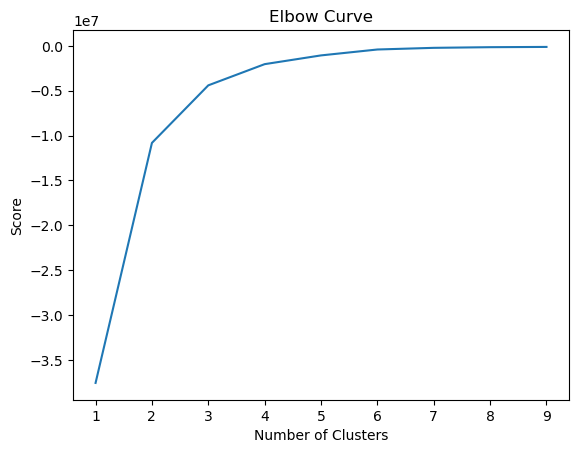

In [42]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [43]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [44]:
# Fit the k-means object to the data.
kmeans.fit(result_2)

C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [45]:
result_2['clusters'] = kmeans.fit_predict(result_2)

C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [46]:
result_2.head()

,start_hour,ride_count,avg_duration,avg_age,clusters
0,0,420,748.716667,748.716667,1
1,1,266,702.657895,702.657895,1
2,2,162,659.561728,659.561728,1
3,3,96,687.020833,687.020833,1
4,4,75,667.106667,667.106667,1


In [47]:
#cluster count
result_2['clusters'].value_counts()

1    8
0    8
3    6
2    2
Name: clusters, dtype: int64

In [48]:
by_hour = result_2[['ride_count','avg_duration','avg_age']]

In [49]:
by_hour

,ride_count,avg_duration,avg_age
0,420,748.716667,748.716667
1,266,702.657895,702.657895
2,162,659.561728,659.561728
3,96,687.020833,687.020833
4,75,667.106667,667.106667
5,195,605.348718,605.348718
6,889,648.613048,648.613048
7,1980,727.038384,727.038384
8,3127,756.595459,756.595459
9,2598,728.346035,728.346035


# Elbow again

In [50]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [51]:
score = [kmeans[i].fit(by_hour).score(by_hour) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

[-37576360.19699327,
 -10821585.248318417,
 -4406438.352348471,
 -2044803.6071389876,
 -1035021.9435297627,
 -411714.52697508276,
 -226961.5180612645,
 -154184.84611957212,
 -120710.12954389834]

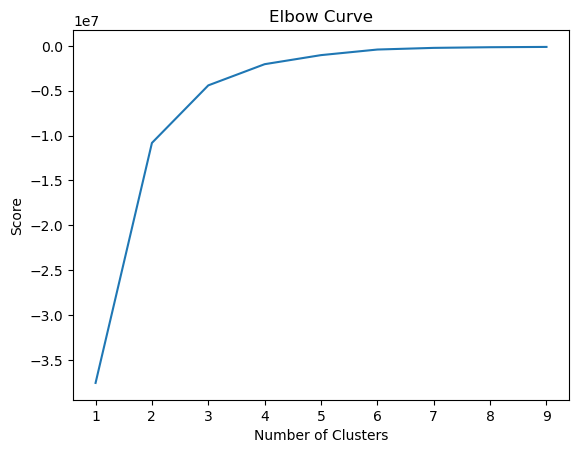

In [52]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# K means

In [53]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4) 

In [54]:
# Fit the k-means object to the data.
kmeans.fit(by_hour)

C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [55]:
by_hour['clusters'] = kmeans.fit_predict(by_hour)

C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cook family\AppData\Local\Temp\ipykernel_6884\2371176289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_hour['clusters'] = kmeans.fit_predict(by_hour)


In [56]:
by_hour.head()

,ride_count,avg_duration,avg_age,clusters
0,420,748.716667,748.716667,0
1,266,702.657895,702.657895,0
2,162,659.561728,659.561728,0
3,96,687.020833,687.020833,0
4,75,667.106667,667.106667,0


In [57]:
#cluster count
by_hour['clusters'].value_counts()

0    8
1    8
3    6
2    2
Name: clusters, dtype: int64

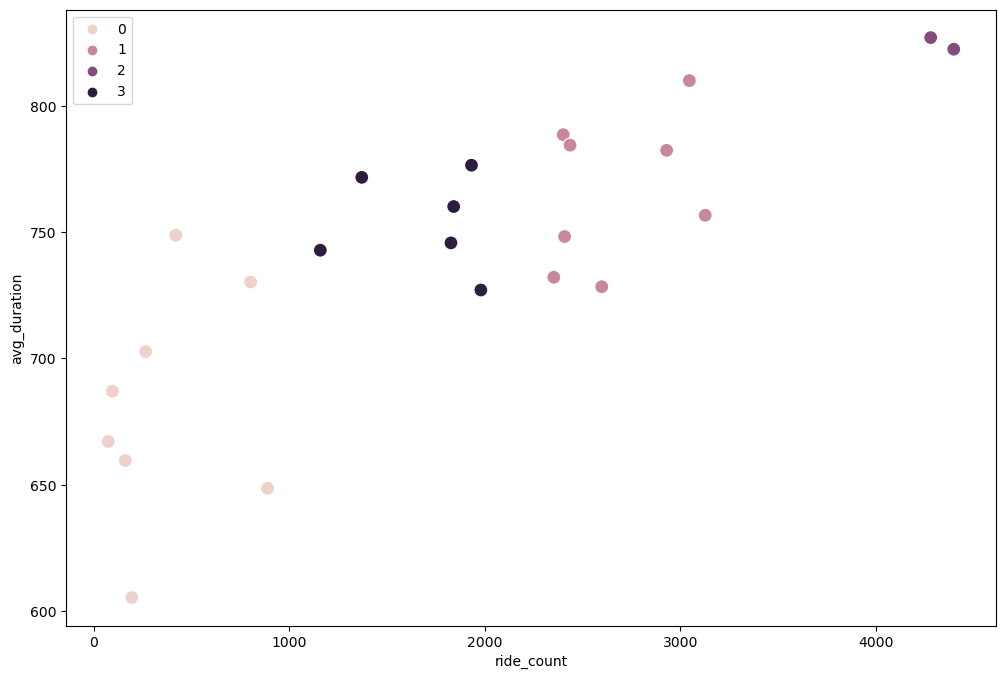

In [58]:
# ride count and avg duration
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=by_hour['ride_count'], y=by_hour['avg_duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('ride_count') # Label x-axis.
plt.ylabel('avg_duration') # Label y-axis.
plt.show()

# Descriptive statistics on group by df

In [59]:
by_hour.loc[by_hour['clusters'] == 0, 'cluster'] = 'light pink'
by_hour.loc[by_hour['clusters'] == 1, 'cluster'] = 'pink'
by_hour.loc[by_hour['clusters'] == 2, 'cluster'] = 'purple'
by_hour.loc[by_hour['clusters'] == 3, 'cluster'] = 'dark purple'

In [60]:
by_hour.groupby('cluster').agg({'ride_count':['mean', 'median'], 
                         'avg_duration':['mean', 'median'], 
                         'avg_age':['mean', 'median']})

ride_count         avg_duration                 avg_age  \
                  mean  median         mean      median        mean   
cluster                                                               
dark purple   1685.000  1834.0   753.933466  752.874956  753.933466   
light pink     363.250   230.5   681.153101  677.063750  681.153101   
pink          2662.375  2517.0   766.283308  769.453020  766.283308   
purple        4339.000  4339.0   824.609768  824.609768  824.609768   

                         
                 median  
cluster                  
dark purple  752.874956  
light pink   677.063750  
pink         769.453020  
purple       824.609768

# The dark purple represents that people are taking the most rides and longest distance.

# I think it would be helpful to look at gender and subscribers in a cluster.

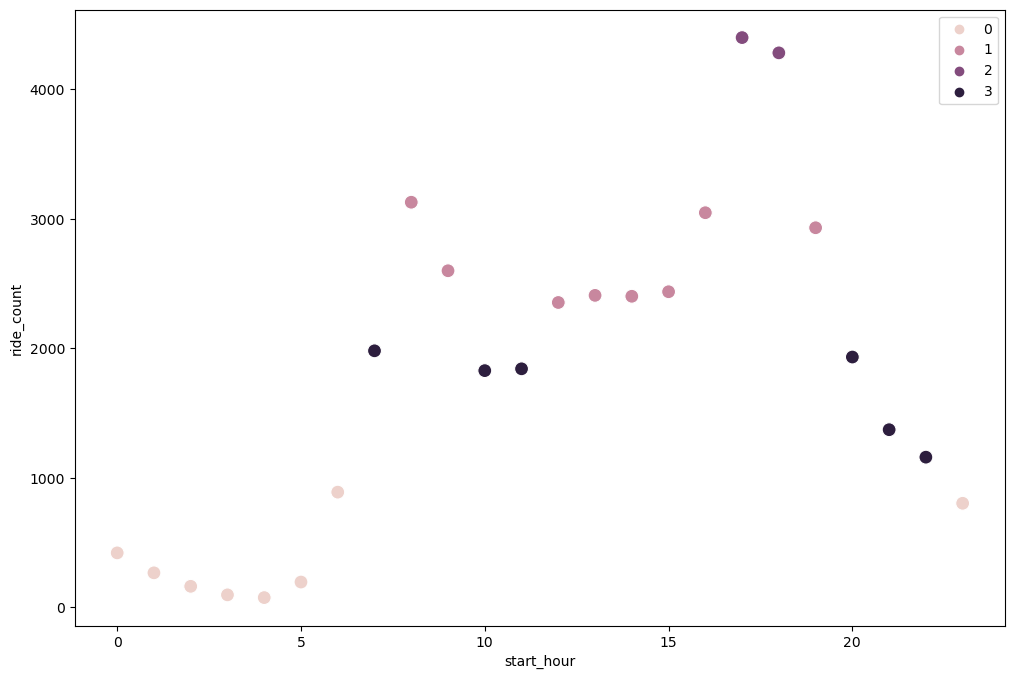

In [61]:
# start hour and ride count
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=result_2['start_hour'], y=result_2['ride_count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('start_hour') # Label x-axis.
plt.ylabel('ride_count') # Label y-axis.
plt.show()

## I'm unsure if this is a valid use of kmeans because hour isnt a numeric variable BUT essentially this illustrates the ride count is down in the early morning hours and rises from 6am peaking at 9am - drops a little then rises peaks again from 5-6 then again dropping slowly through the night - this shows that people use the bikes mostly before ad after work

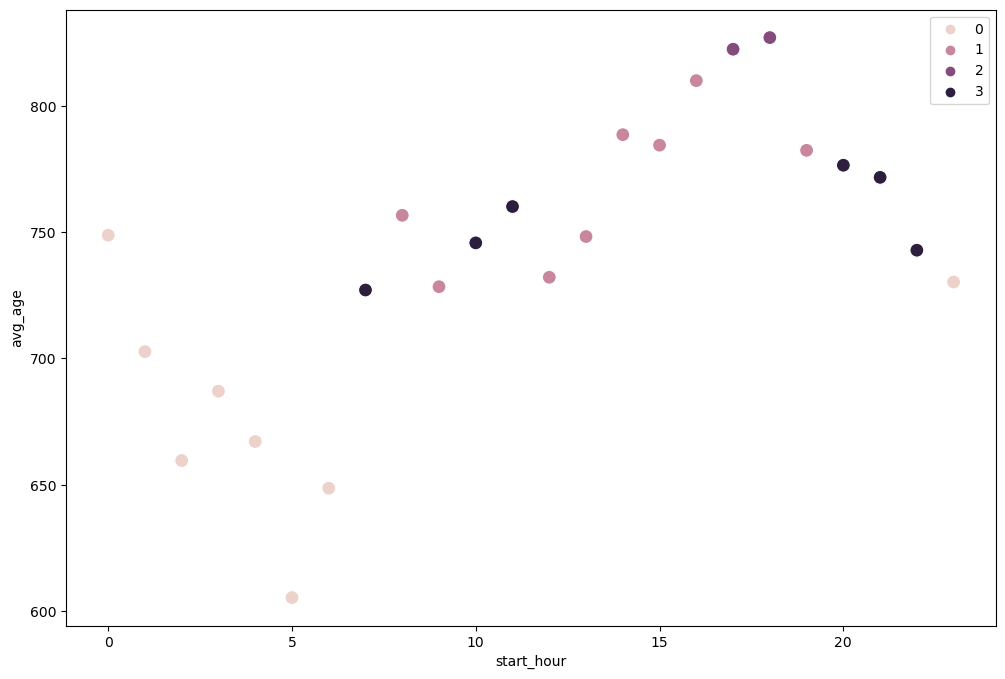

In [62]:
# start hour and avg age
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=result_2['start_hour'], y=result_2['avg_age'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('start_hour') # Label x-axis.
plt.ylabel('avg_age') # Label y-axis.
plt.show()

# younger people use bikes at nighttime hours more than older people.

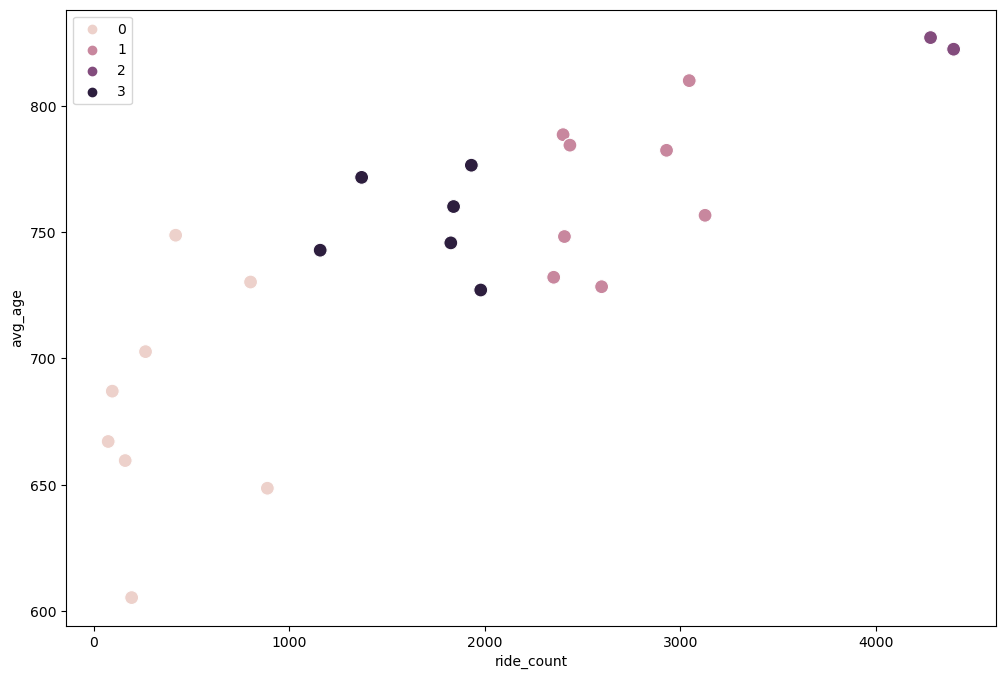

In [63]:
# Plot the clusters 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=by_hour['ride_count'], y=by_hour['avg_age'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('ride_count') # Label x-axis.
plt.ylabel('avg_age') # Label y-axis.
plt.show()

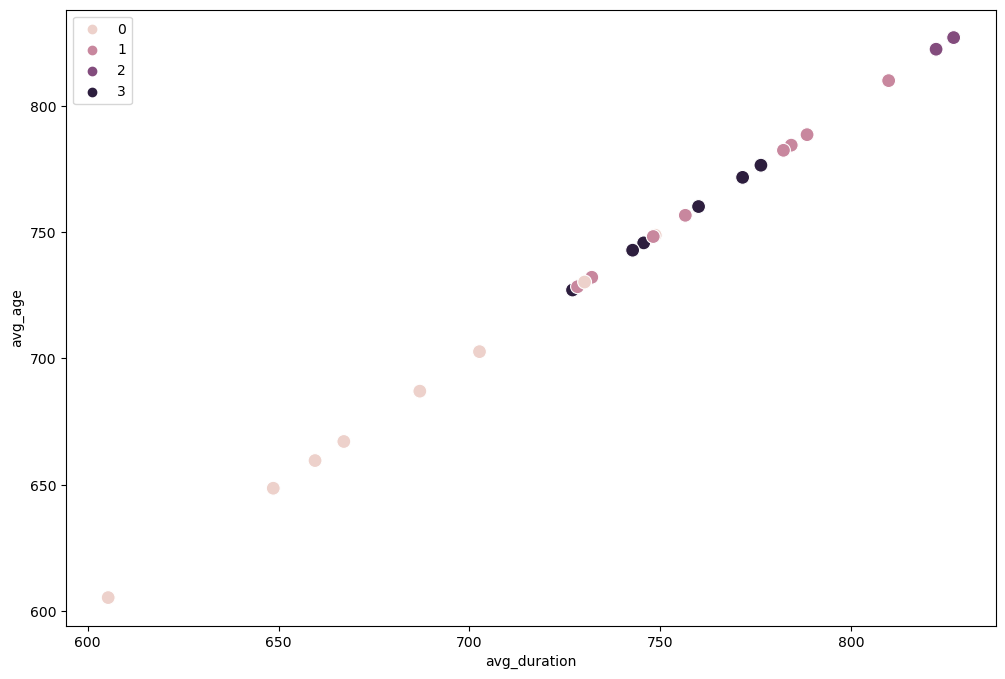

In [64]:
# Plot the clusters 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=by_hour['avg_duration'], y=by_hour['avg_age'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('avg_duration') # Label x-axis.
plt.ylabel('avg_age') # Label y-axis.
plt.show()

# People who are older tend to take longer rides.

In [65]:
citi_3=citibike[[ 'trip_duration', 'birth_year']]

In [66]:
citi_3

,trip_duration,birth_year
0,993,1968.0
1,581,1983.0
2,361,1989.0
3,561,1988.0
4,427,1986.0
...,...,...
42988,975,1973.0
42989,1541,1975.0
42990,1191,1970.0
42991,1050,1961.0


# Elbow

In [67]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [68]:
score = [kmeans[i].fit(citi_3).score(citi_3) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cook family\anaconda3\L

[-11784688493.782518,
 -3833529229.896005,
 -1869109059.005798,
 -1092100759.2559042,
 -709927509.1660317,
 -492253831.4526152,
 -362003852.38244504,
 -279601519.41761386,
 -221343571.46413293]

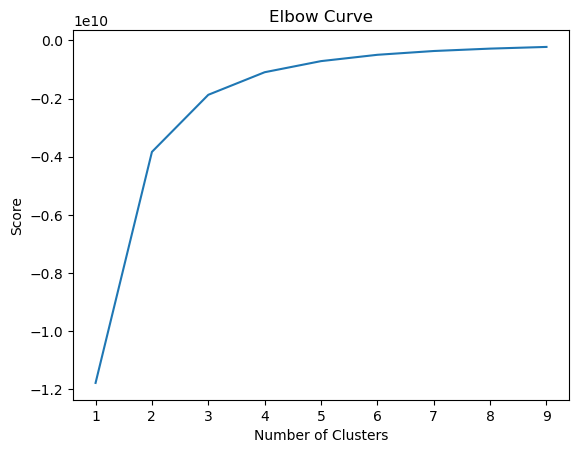

In [69]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [70]:
# 5 clusters

In [71]:
# kmeans

In [72]:
#Create the K-means object
kmeans = KMeans(n_clusters = 5) 

In [73]:
kmeans.fit(citi_3)

C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [74]:
citi_3['clusters'] = kmeans.fit_predict(citi_3)

C:\Users\cook family\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cook family\AppData\Local\Temp\ipykernel_6884\3806875805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citi_3['clusters'] = kmeans.fit_predict(citi_3)


In [75]:
citi_3.head()

,trip_duration,birth_year,clusters
0,993,1968.0,3
1,581,1983.0,0
2,361,1989.0,4
3,561,1988.0,0
4,427,1986.0,4


In [76]:
citi_3['clusters'].value_counts()

4    15223
0    13487
3     8142
1     4390
2     1751
Name: clusters, dtype: int64

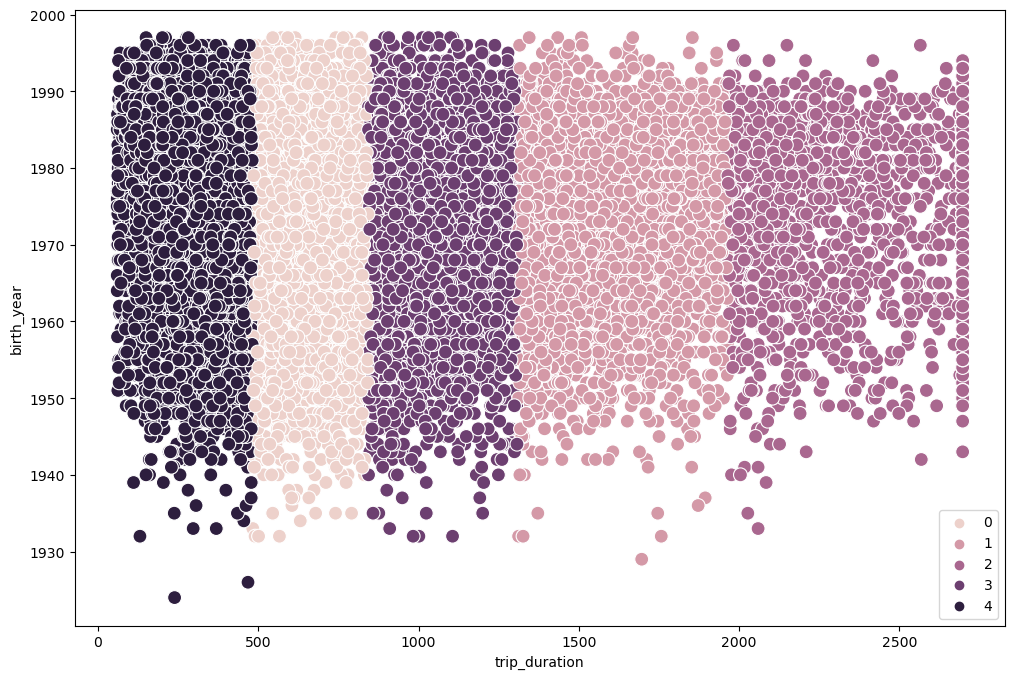

In [77]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=citi_3['trip_duration'], y=citi_3['birth_year'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('trip_duration') # Label x-axis.
plt.ylabel('birth_year') # Label y-axis.
plt.show()

In [78]:
citi.head()

,day_of_the_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,trip category,ride_start_date,ride_start_time
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:00,2013-09-09 18:35:00,10-20 minutes,2013-09-09,2023-10-20 18:35:00
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:00,2013-09-12 18:48:00,under 10 minutes,2013-09-12,2023-10-20 18:48:00
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:00,2013-09-18 19:50:00,under 10 minutes,2013-09-18,2023-10-20 19:50:00
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:00,2013-09-28 12:03:00,under 10 minutes,2013-09-28,2023-10-20 12:03:00
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:00,2013-09-27 22:08:00,under 10 minutes,2013-09-27,2023-10-20 22:08:00


In [79]:
# saving to csv
citi.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_5.csv'))